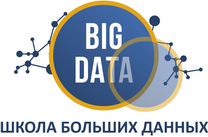

## SVM: линейно разделимая выборка

### Создадим синтетические линейно разделимые данные

In [175]:
import numpy as np
# import seaborn as sb
import matplotlib.pyplot as plt
import math as m
from sklearn.datasets import make_gaussian_quantiles


In [176]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(mean=(10, 1), cov=5.,
                                 n_samples=200, n_features=2,
                                 n_classes=1, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(-10, 1), cov=5.,
                                 n_samples=200, n_features=2,
                                 n_classes=1, random_state=1)

In [177]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2 + 1))

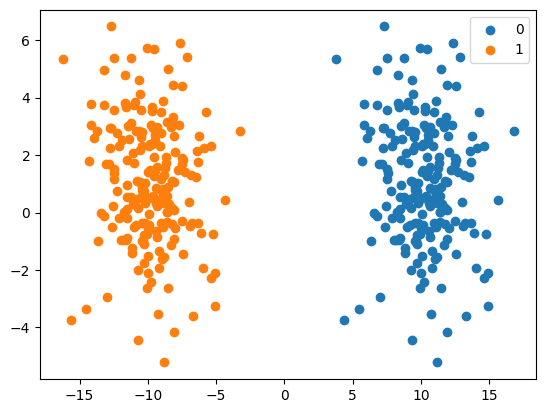

In [178]:
feats = X
target = y

f, ax = plt.subplots(1)
for i in np.unique(target):
    mask = target == i
    plt.scatter(feats[mask, 0], feats[mask, 1], label=i)
ax.legend()

### Учим SVM

In [179]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')

clf.fit(X, y) 

SVC(kernel='linear')

In [180]:
y_pred = clf.predict(X)

In [181]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred))

1.0


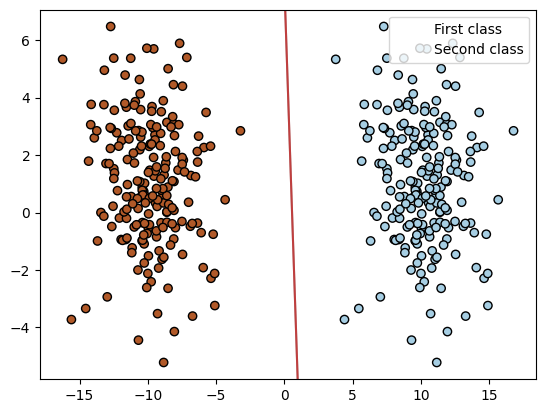

In [182]:
def plot_the_samples(X,y, model_):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = clf.decision_function(xy).reshape(XX.shape)

    a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

    Z = model_.decision_function(xy).reshape(XX.shape)

    b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

    plt.legend([a.collections[0], b.collections[0]], ["First class", "Second class"],
           loc="upper right")
    plt.show()
plot_the_samples(X,y,clf)

## SVM: линейно неразделимая выборка

### Создадим синтетические линейно неразделимые данные

In [183]:
import math
import random

r_squared = [random.uniform(0, 1) for i in range(200)]
theta = [2*math.pi*random.random() for i in range(200)]

In [184]:
x =[math.sqrt(r_squared[i])*math.cos(theta[i]) for i in range(200)] 
y =[math.sqrt(r_squared[i])*math.sin(theta[i]) for i in range(200)]

In [185]:
X_cycle = np.array([np.array([x[i],y[i]]) for i in range(200)] )

In [186]:
X_cycle.shape

(200, 2)

In [187]:
r_notsquared = [random.uniform(1, 2) for i in range(200)]
theta = [2*math.pi*random.random() for i in range(200)]

In [188]:
x =[math.sqrt(r_notsquared[i])*math.cos(theta[i]) for i in range(200)] 
y =[math.sqrt(r_notsquared[i])*math.sin(theta[i]) for i in range(200)]

In [189]:
X_notcycle = np.array([np.array([x[i],y[i]]) for i in range(200)] )

In [190]:
X_full = np.concatenate((X_cycle , X_notcycle), axis=0 )
y = np.concatenate((np.zeros(200),np.zeros(200) + 1))

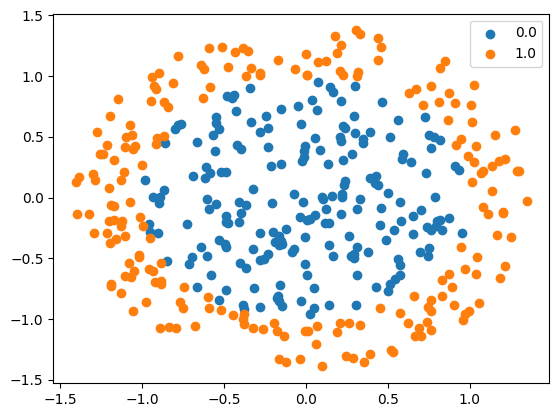

In [191]:
feats = X_full
target = y

f, ax = plt.subplots(1)
for i in np.unique(target):
    mask = target == i
    plt.scatter(feats[mask, 0], feats[mask, 1], label=i)
ax.legend()

### Обучаем SVM

In [192]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_full, y) 

SVC(kernel='linear')

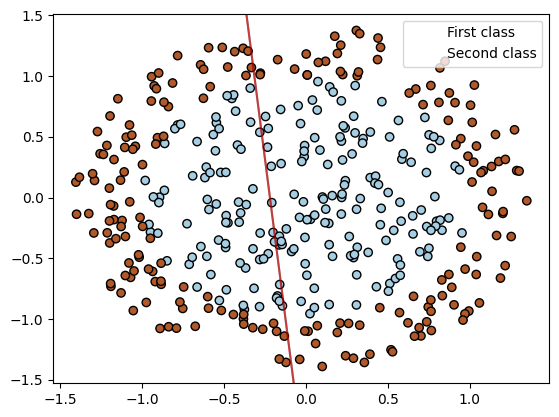

In [193]:
plot_the_samples(X_full,y,clf)

In [194]:

C = 1.0  # SVM regularization parameter
model1 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)
model2 = svm.SVC(kernel='poly', degree=16, gamma='auto', C=1)
model1.fit(X_full, y)
model2.fit(X_full, y)

SVC(C=1, degree=16, gamma='auto', kernel='poly')

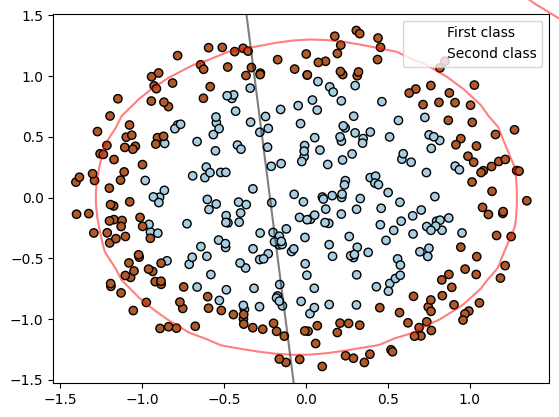

In [195]:
plot_the_samples(X_full,y,model2)

## Применить способ "спрямляющее пространство" для достижения линейной разделимости классов

Попробуем добавить третье пространство простым сложением двух первых и построить графики по первому и производному

In [196]:
def create_third_dimension(pair):
    
    return [pair[0], pair[1], m.hypot(pair[0] , pair[1])]

X_full = np.array(list(map(create_third_dimension,(X_full))))
X_full

array([[-0.48897322, -0.41019161,  0.63824131],
       [ 0.45959257, -0.08757601,  0.46786204],
       [-0.5454778 ,  0.61673763,  0.82335372],
       ...,
       [ 0.73749634, -1.02205795,  1.2603584 ],
       [-0.88253539, -0.53942969,  1.03433703],
       [ 0.00248201,  1.18280422,  1.18280682]])

Методом научного тыка понимаю, что гипотенуза, а в данном случа длина вектора, лучше всего подходит для третьего измерения

In [197]:
import plotly.express as px

In [198]:
fig = px.scatter_3d(x = X_full[:,0], 
                    y = X_full[:,1], 
                    z = X_full[:,2],
                    color = y)
  
fig.show()

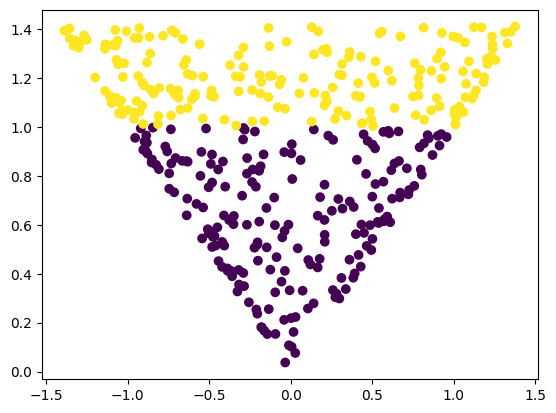

In [199]:
plt.scatter(x = X_full[:,1], 
                    y = X_full[:,2], c=y)

Теперь все классы прекрасно разделимы линейно 

In [200]:
first_and_third = X_full[:,[0,2]]

In [201]:
second_and_third = X_full[:,[1,2]]

Обе пары подходят для разделения, попробуем обе

In [202]:
svc = svm.SVC(kernel = 'poly',C=1,degree=10,random_state=42,coef0=1,)
svc.fit(second_and_third, y)

SVC(C=1, coef0=1, degree=10, kernel='poly', random_state=42)

Коэффициенты подобраны так, чтобы максимизировать точность

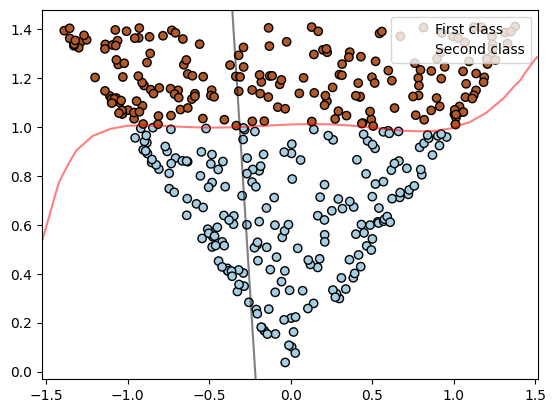

In [203]:
plot_the_samples(second_and_third, y, svc)

In [204]:
y_pred = svc.predict(first_and_third)

In [205]:
print(accuracy_score(y,y_pred))


0.99


Отличное разделение, но хочется 100 на обучающих данных

In [206]:
svc = svm.SVC(kernel = 'poly',C=1,degree=10,random_state=42,coef0=1,)
svc.fit(first_and_third, y)

SVC(C=1, coef0=1, degree=10, kernel='poly', random_state=42)

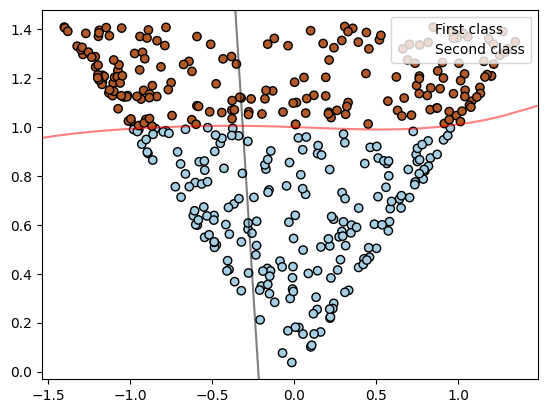

In [207]:
plot_the_samples(first_and_third, y, svc)


In [208]:
y_pred = svc.predict(first_and_third)


In [209]:
print(accuracy_score(y,y_pred))


1.0


Вот это то, что я искал, подходит